## Nifty 50 stock analysis

### Scraping Nifty 50 stocks from wikipedia

In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
webpage = requests.get('https://en.wikipedia.org/wiki/NIFTY_50').text

In [3]:
soup = BeautifulSoup(webpage, 'lxml')

In [4]:
table = soup.find('table' ,class_="wikitable sortable")

In [5]:
rows = table.find_all('tr')[1:]

In [6]:
Nifty50 = []
for row in rows:
    tkr = row.find_all('td')[1].text
    Nifty50.append(tkr)

In [7]:
Nifty50[:6]

['ADANIENT',
 'ADANIPORTS',
 'APOLLOHOSP',
 'ASIANPAINT',
 'AXISBANK',
 'BAJAJ-AUTO']

###  Fetching historical data for a stock

In [39]:
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf
import datetime as dt

In [9]:
yf.pdr_override()

In [10]:
start = dt.datetime(2022,3,1)
end = dt.datetime.now()

In [11]:
data = pdr.get_data_yahoo('INFY', start, end)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-01,22.389999,22.500000,22.040001,22.160000,21.679264,6930300
2022-03-02,22.209999,22.780001,22.170000,22.590000,22.099936,8749500
2022-03-03,22.850000,22.940001,22.430000,22.520000,22.031454,7023600
2022-03-04,22.280001,22.549999,22.150000,22.459999,21.972754,13424500
2022-03-07,22.280001,22.580000,22.190001,22.580000,22.090151,14195100
...,...,...,...,...,...,...
2023-03-23,16.860001,17.059999,16.660000,16.940001,16.940001,14192500
2023-03-24,16.750000,16.809999,16.650000,16.799999,16.799999,6230000
2023-03-27,16.900000,17.040001,16.830000,17.020000,17.020000,11983600


### Stock price visualization using candlestick charts

In [12]:
mpf.available_styles()

['binance',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'ibd',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']

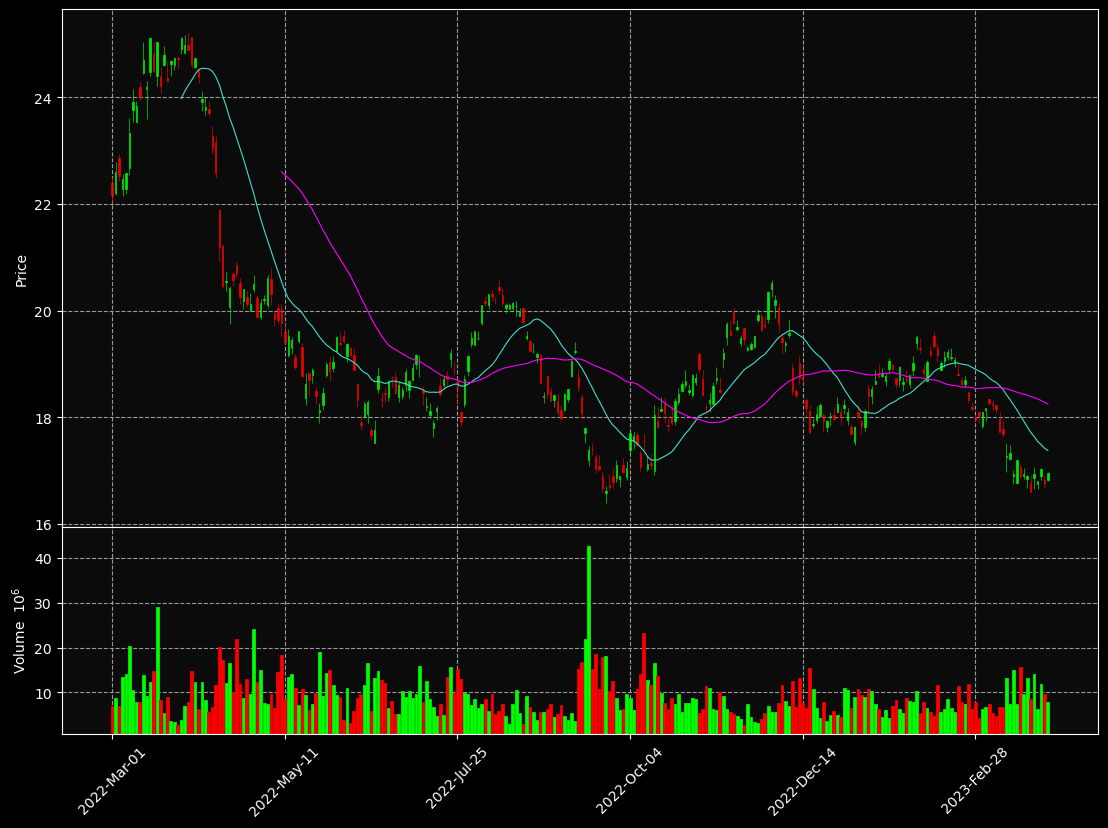

In [13]:
colors = mpf.make_marketcolors(up = '#00ff00', down = '#ff0000', wick = 'inherit', edge = 'inherit', volume = 'in')
m_style = mpf.make_mpf_style(base_mpf_style = 'nightclouds', marketcolors = colors)
mpf.plot(data, type = 'candle', mav = (21,50), figscale = 1.8, style = m_style, volume = True)

In [40]:
import yfinance as yf
import pandas as pd

In [41]:
tkr = yf.Ticker("INFY.NS")

In [42]:
help(tkr)

Help on Ticker in module yfinance.ticker object:

class Ticker(yfinance.base.TickerBase)
 |  Ticker(ticker, session=None)
 |  
 |  Method resolution order:
 |      Ticker
 |      yfinance.base.TickerBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, ticker, session=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  option_chain(self, date=None, proxy=None, tz=None)
 |  
 |  ----------------------------------------------------------------------
 |  Readonly properties defined here:
 |  
 |  actions
 |  
 |  analyst_price_target
 |  
 |  balance_sheet
 |  
 |  balancesheet
 |  
 |  calendar
 |  
 |  capital_gains
 |  
 |  cash_flow
 |  
 |  cashflow
 |  
 |  dividends
 |  
 |  earnings
 |  
 |  earnings_dates
 |  
 |  earnings_forecasts
 |  
 |  earnings_trend
 |  
 |  financials
 |  
 |  history_metadata
 |  
 |  income_stmt
 |  
 |  incomestmt
 |  
 |  info
 |  
 |  in

In [43]:
tkr.actions

,Dividends,Stock Splits
Date,,
1996-04-30 00:00:00+05:30,0.006836,0.0
1996-10-28 00:00:00+05:30,0.002930,0.0
1997-05-23 00:00:00+05:30,0.007813,0.0
1997-08-19 00:00:00+05:30,0.000000,2.0
1997-12-17 00:00:00+05:30,0.005859,0.0
...,...,...
2020-10-23 00:00:00+05:30,12.000000,0.0
2021-05-31 00:00:00+05:30,15.000000,0.0
2021-10-26 00:00:00+05:30,15.000000,0.0
